In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets-related-to-animation/Animation.csv
/kaggle/input/datasets-related-to-animation/Anime.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Anime Data Analytics**

In this python notebook, my aim is to analyze what is the top 50 best anime of all-time based on the dataset provided here. I have to be honest, as an anime fan, my favorite anime all-time would be One Piece by Eiichiro Oda. I do hope that, the data shows the same here in this dataset. lol. But, we will be fair to the dataset and pronounce here, based on the dataset what the top 50 animes of all-time will be. This analysis is based on the dataset postes by Bangarus and the information from the datasets was collected from reviewers.

Let's begin the journey!
行くぞ!


# **Loading the Datasets**

Here I will load the dataset to see the structure of the data available

In [4]:
#anime data
anime_df = pd.read_csv('/kaggle/input/datasets-related-to-animation/Anime.csv')
anime_df.head(10)

,animeID,name,studio,episodes,airing,rank,popularity,members,favorites,reviewers,Animation_score
0,1,0,0,26,False,26,39,795733,43460,405664,8.81
1,5,0,0,1,False,164,449,197791,776,120243,8.41
2,6,0,0,26,False,255,146,408548,10432,212537,8.30
3,7,0,0,26,False,2371,1171,79397,537,32837,7.33
4,8,0,0,52,False,3544,3704,11708,14,4894,7.03
5,16,0,0,24,False,419,536,172274,3752,57065,8.12
6,17,0,0,52,False,1186,3124,17145,210,9307,7.67
7,18,0,0,24,False,298,1262,73438,635,42555,8.23
8,19,0,0,74,False,49,156,394387,19188,131233,8.69
9,20,0,0,220,False,705,10,1091313,39356,716412,7.90


In [5]:
#animation data.
animation_df = pd.read_csv('/kaggle/input/datasets-related-to-animation/Animation.csv')
animation_df.head(8)

,animeID,name,source,producers,genre,studio,episodes,airing,rank,popularity,members,favorites,reviewers,Animation_score
0,1,Cowboy Bebop,Original,Bandai Visual,Action,Sunrise,26.0,False,26,39,795733,43460,405664,8.81
1,5,Cowboy Bebop: Tengoku no Tobira,Original,Sunrise,Action,Bones,1.0,False,164,449,197791,776,120243,8.41
2,6,Trigun,Manga,Victor Entertainment,Action,Madhouse,26.0,False,255,146,408548,10432,212537,8.30
3,7,Witch Hunter Robin,Original,Bandai Visual,Action,Sunrise,26.0,False,2371,1171,79397,537,32837,7.33
4,8,Bouken Ou Beet,Manga,TV Tokyo,Adventure,Toei Animation,52.0,False,3544,3704,11708,14,4894,7.03
5,16,Hachimitsu to Clover,Manga,Genco,Comedy,J.C.Staff,24.0,False,419,536,172274,3752,57065,8.12
6,17,Hungry Heart: Wild Striker,Manga,NaN,Slice of Life,Nippon Animation,52.0,False,1186,3124,17145,210,9307,7.67
7,18,Initial D Fourth Stage,Manga,OB Planning,Action,A.C.G.T.,24.0,False,298,1262,73438,635,42555,8.23


As seen in the datasets, the animation dataset is just the complete version of the anime dataset so I will just focus on the animation dataset. In this analysis I will try to answer based on the data, which is the all-time best anime among these list?

# **Data Cleaning and EDA**

Now, I will focus on cleaning the dataset and doing Exploratory Data Analysis with it after that.

First, we will check if there are missing data in the dataset.

In [6]:
animation_df.shape

(13631, 14)

This shows that there are 13,631 rows of data meaning there are 13,631 animes listed in this dataset and there are 14 columns which shows what kind of data was collected for this dataset.

Now I will check for missing datas in the dataset. First, I will check how many rows from the dataset has missing data.

In [7]:
na_rows = animation_df[animation_df.isna().any(axis=1)]
na_rows

,animeID,name,source,producers,genre,studio,episodes,airing,rank,popularity,members,favorites,reviewers,Animation_score
6,17,Hungry Heart: Wild Striker,Manga,NaN,Slice of Life,Nippon Animation,52.0,False,1186,3124,17145,210,9307,7.67
10,21,One Piece,Manga,Fuji TV,Action,Toei Animation,NaN,True,94,36,803871,76869,465454,8.53
12,23,Ring ni Kakero 1,Manga,NaN,Action,Toei Animation,12.0,False,5641,6501,2930,18,825,6.54
15,27,Trinity Blood,Light novel,NaN,Action,Gonzo,24.0,False,2081,695,137800,1403,61471,7.40
76,106,Hana yori Dango,Manga,NaN,Drama,Toei Animation,51.0,False,819,2031,37364,646,15258,7.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13626,39189,Te Ke Dong Ji Pian,Unknown,NaN,Action,NaN,54.0,False,13301,15461,7,0,0,NaN
13627,39190,Wang Zhe Wai Chuan,Unknown,NaN,Comedy,NaN,12.0,False,13570,15472,7,0,0,NaN
13628,39191,Wan Jie Shen Zhu,Unknown,NaN,Fantasy,NaN,60.0,False,13568,15470,7,0,0,NaN
13629,39192,Xia Gu Zhong An Zu,Unknown,NaN,Fantasy,NaN,12.0,False,13635,15473,7,0,0,NaN


As seen in the dataset, there are 8713 rows that have have missing data on them. The missing data comes mostly from the 'producers' columns and the 'studio' column which means the producers and the studio that made the animation are unknown. Also, the 'genre', 'episodes' and 'Animation_score' columns for some anime are also NA. To solve this, the producer and the studio columns will just be replaced as 'Unknown' since I don't need their information for the analysis. But for the other 3, I have to consider if I will use the data for determining the GOAT (Greatest of all-time) animes.

In [8]:
animation_df[['producers', 'studio']] = animation_df[['producers', 'studio']].fillna('Unknown')
animation_df

,animeID,name,source,producers,genre,studio,episodes,airing,rank,popularity,members,favorites,reviewers,Animation_score
0,1,Cowboy Bebop,Original,Bandai Visual,Action,Sunrise,26.0,False,26,39,795733,43460,405664,8.81
1,5,Cowboy Bebop: Tengoku no Tobira,Original,Sunrise,Action,Bones,1.0,False,164,449,197791,776,120243,8.41
2,6,Trigun,Manga,Victor Entertainment,Action,Madhouse,26.0,False,255,146,408548,10432,212537,8.30
3,7,Witch Hunter Robin,Original,Bandai Visual,Action,Sunrise,26.0,False,2371,1171,79397,537,32837,7.33
4,8,Bouken Ou Beet,Manga,TV Tokyo,Adventure,Toei Animation,52.0,False,3544,3704,11708,14,4894,7.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13626,39189,Te Ke Dong Ji Pian,Unknown,Unknown,Action,Unknown,54.0,False,13301,15461,7,0,0,NaN
13627,39190,Wang Zhe Wai Chuan,Unknown,Unknown,Comedy,Unknown,12.0,False,13570,15472,7,0,0,NaN
13628,39191,Wan Jie Shen Zhu,Unknown,Unknown,Fantasy,Unknown,60.0,False,13568,15470,7,0,0,NaN
13629,39192,Xia Gu Zhong An Zu,Unknown,Unknown,Fantasy,Unknown,12.0,False,13635,15473,7,0,0,NaN


In [9]:
na_rows = animation_df[animation_df.isna().any(axis=1)]
print(na_rows.shape)

print(animation_df.isna().sum())

(453, 14)
animeID              0
name                 0
source               0
producers            0
genre               62
studio               0
episodes           282
airing               0
rank                 0
popularity           0
members              0
favorites            0
reviewers            0
Animation_score    113
dtype: int64


In [10]:
animation_df.isna().sum()

animeID              0
name                 0
source               0
producers            0
genre               62
studio               0
episodes           282
airing               0
rank                 0
popularity           0
members              0
favorites            0
reviewers            0
Animation_score    113
dtype: int64

Now, I only have 453 rows of data that have missing values in them. I will now consider each column with missing values and determine what to do with each column. Here I will do exploratory Data Analysis to determine what to do with them.

## **Genre**
For the genre, I will check first how many genres and available in the dataset and determine which genre has the most number of animes.

In [11]:
print(animation_df['genre'].nunique())
print(animation_df['genre'].unique())
print(animation_df['genre'].mode())

38
['Action' 'Adventure' 'Comedy' 'Slice of Life' 'Drama' 'Sci-Fi' 'Samurai'
 'Game' 'Harem' 'Military' 'Space' 'Music' 'Supernatural' 'Historical'
 'Magic' 'School' 'Mystery' 'Fantasy' 'Horror' 'Ecchi' 'Kids' 'Sports'
 'Dementia' 'Romance' 'Police' 'Cars' 'Shounen' 'Demons' 'Parody'
 'Psychological' 'Mecha' 'Shoujo' 'Super Power' 'Vampire' 'Martial Arts'
 'Thriller' 'Seinen' 'Josei' nan]
0    Action
Name: genre, dtype: object


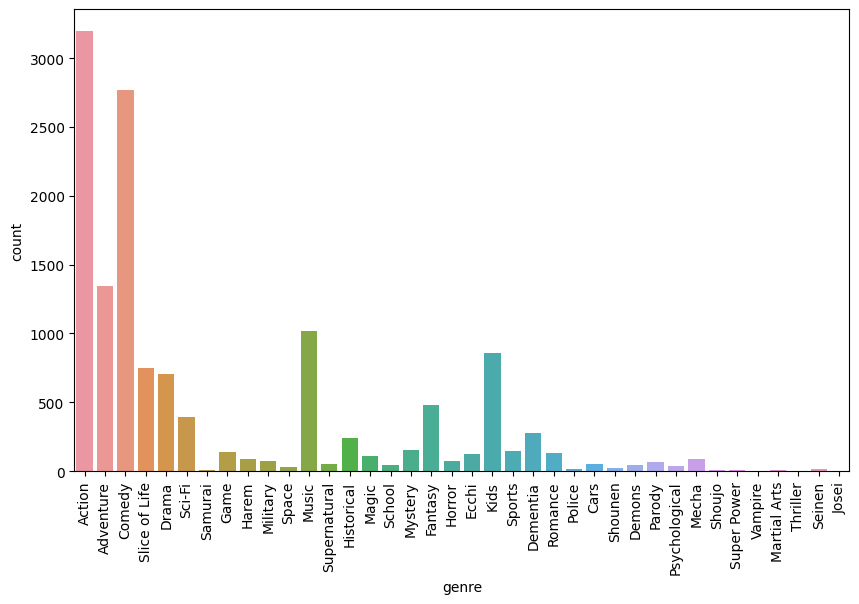

In [12]:
#Visualization

plt.figure(figsize=(10,6))
sns.countplot(x='genre', data=animation_df)
plt.xticks(rotation=90)
plt.show()

This shows that there are 38 genres in this dataset from experience with anime and manga most of this genres overlap. So for the sake of time I will not include this column for the consideration.Also, based on the graph, the most common genre is action and based on my experince Adventure, Comedy, and a lot more of the other genres will mostly fall into the action genre. So I have 2 options here, its either I rename the missing data into action or just rename it as unknown. I will just label the missing data as 'Unknown' in the dataset since I will not use this one.

## **Episodes Column**
Here, I will analyze if I will add the number of episodes to the factors to consider in analyzing the GOATs of Anime.

In [12]:
#check for anime names with missing episodes 
missing_anime_episodes = animation_df[['name','airing']][animation_df['episodes'].isna()]
missing_anime_episodes.head(40)

,name,airing
10,One Piece,True
184,Detective Conan,True
794,Crayon Shin-chan,True
992,Nintama Rantarou,True
1597,Sore Ike! Anpanman,True
1918,Sazae-san,True
3026,Ojarumaru,True
3627,Chibi Maruko-chan (1995),True
4144,Knyacki!,True
4389,Keshikasu-kun,False


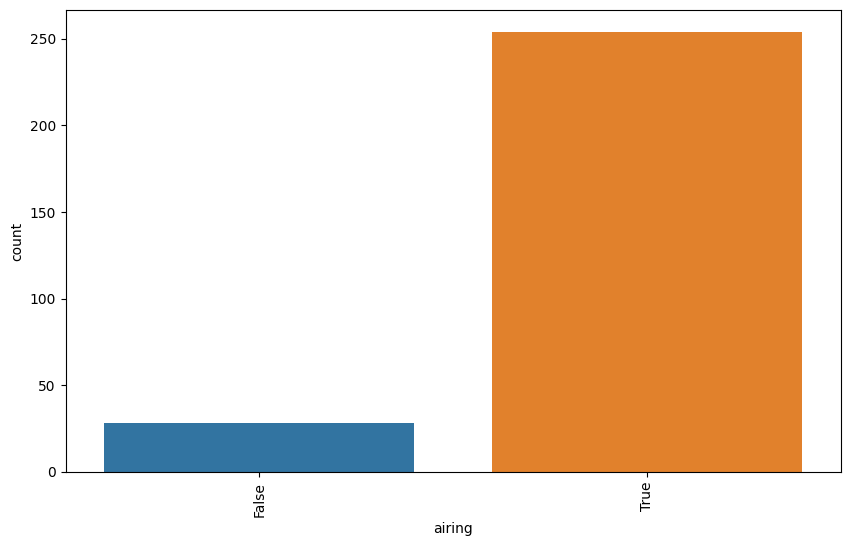

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='airing', data=missing_anime_episodes)
plt.xticks(rotation=90)
plt.show()

In [14]:
missing_anime_episodes['airing'].value_counts(normalize=True)*100

airing
True     90.070922
False     9.929078
Name: proportion, dtype: float64

This shows list of animes that does'nt have number of episodes and if they're ongoing or not. Based on the list, graph and computation, most of the anime that has missing episode data are still ongoing (90.07%). So for the sake of time for me, so that I will not check the animes one by one, I will not include number of episodes in the consideration of weights for ranking.

I will now check the missing data of 'Animation_score' and see if some of them has a ranking of 200 or higher.

In [13]:
ranking_missing = animation_df[['name','rank']][animation_df['Animation_score'].isna()]
ranking_missing.head(20)

,name,rank
11710,Stella-Rium,13171
11739,Sprin' Pan: Mae e Susumou!,13162
11898,Shaolin Chuanqi,12922
11962,Ima,11405
12090,Full Metal Panic! Movie 1: Boy Meets Girl,10933
12091,Full Metal Panic! Movie 2: One Night Stand,10934
12092,Full Metal Panic! Movie 3: Into The Blue,10935
12268,Ajin 2nd Season OVA,10371
12523,Jian Wangchao 2,11462
12561,Islay,11434


In [14]:
ranking_missing['rank'][ranking_missing['rank'] <= 5000]

Series([], Name: rank, dtype: int64)

So this shows that in any of the missing data for 'Animation_score' there are no anime that is in the top 5000 animes in their ranking column. So I will just go drop the missing data since I don't need them.

## **EDA and Visualizations**

Now I will focus on EDA and visualizing our data before I start my ranking. First I just want to see the distribution of the sources of the anime and also the studios that make them.

In [16]:
animation_df.dropna(inplace=True)
animation_df

,animeID,name,source,producers,genre,studio,episodes,airing,rank,popularity,members,favorites,reviewers,Animation_score
0,1,Cowboy Bebop,Original,Bandai Visual,Action,Sunrise,26.0,False,26,39,795733,43460,405664,8.81
1,5,Cowboy Bebop: Tengoku no Tobira,Original,Sunrise,Action,Bones,1.0,False,164,449,197791,776,120243,8.41
2,6,Trigun,Manga,Victor Entertainment,Action,Madhouse,26.0,False,255,146,408548,10432,212537,8.30
3,7,Witch Hunter Robin,Original,Bandai Visual,Action,Sunrise,26.0,False,2371,1171,79397,537,32837,7.33
4,8,Bouken Ou Beet,Manga,TV Tokyo,Adventure,Toei Animation,52.0,False,3544,3704,11708,14,4894,7.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,39096,Danbou to Reibou,Original,Unknown,Dementia,Unknown,1.0,False,10776,15213,38,0,21,2.57
13554,39097,Hana no Nioi,Original,"""Toys Factory""",Drama,Unknown,1.0,False,11138,15293,29,0,17,4.35
13556,39099,Tomo: Tabidachi no Toki,Original,Unknown,Music,Unknown,1.0,False,13398,15346,19,0,7,4.57
13590,39141,Hua Jiang Hu Zhi Bu Liang Ren 3rd Season,Original,Unknown,Drama,Unknown,40.0,True,11345,15227,36,0,2,5.50


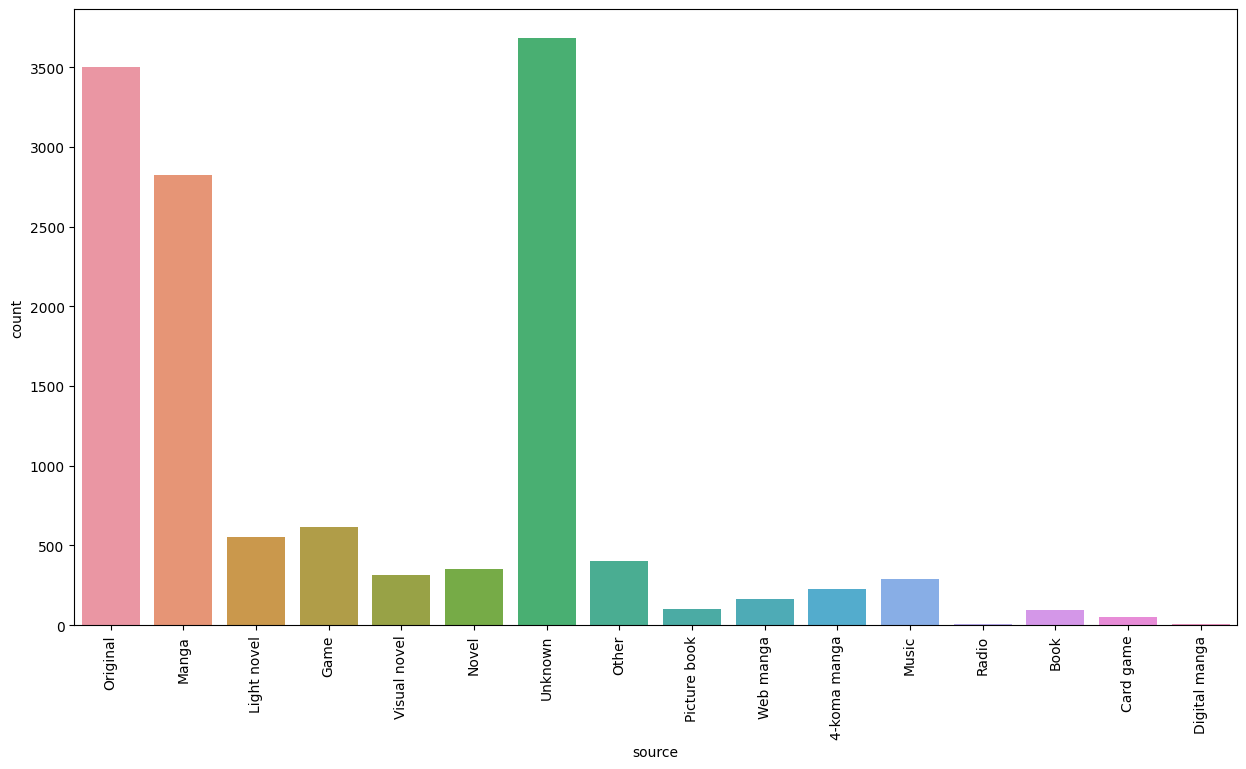

In [17]:
#Sources.

plt.figure(figsize = (15,8))
sns.countplot(x ='source', data =animation_df)
plt.xticks(rotation=90)
plt.show()

As seen here in the graph, excluding for the unknowns, the majority of the anime was made originally for anime. My first thought was it was from manga but turns out a lot of anime was originally planned to be anime. And it is also interesting to see that some anime came from radio.

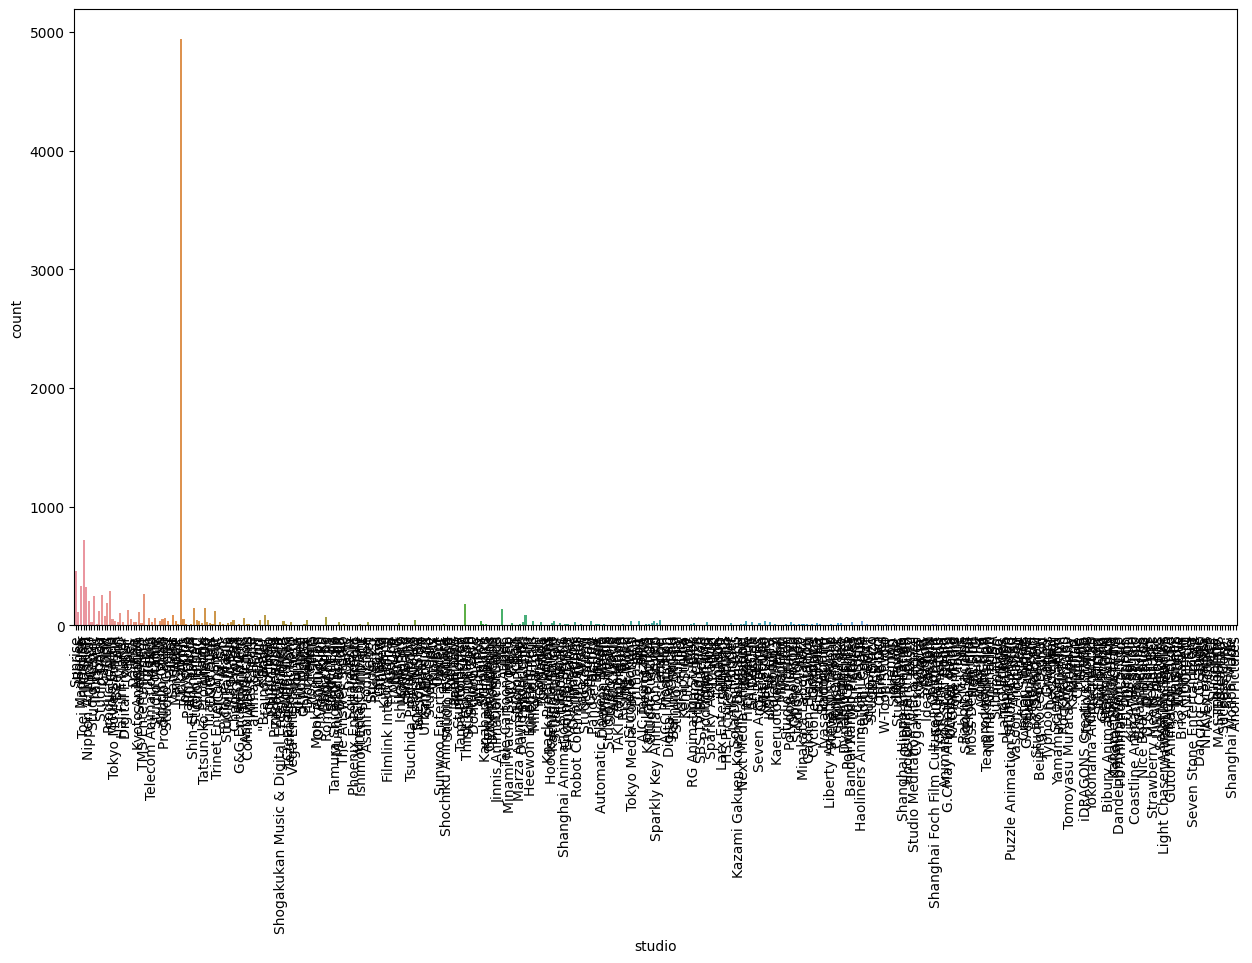

In [18]:
#studio
plt.figure(figsize=(15,8))
sns.countplot(x='studio', data = animation_df)
plt.xticks(rotation = 90)
plt.show()

### Turns out there are way too many animation studios here 😅 so I'll just pick the top 50.

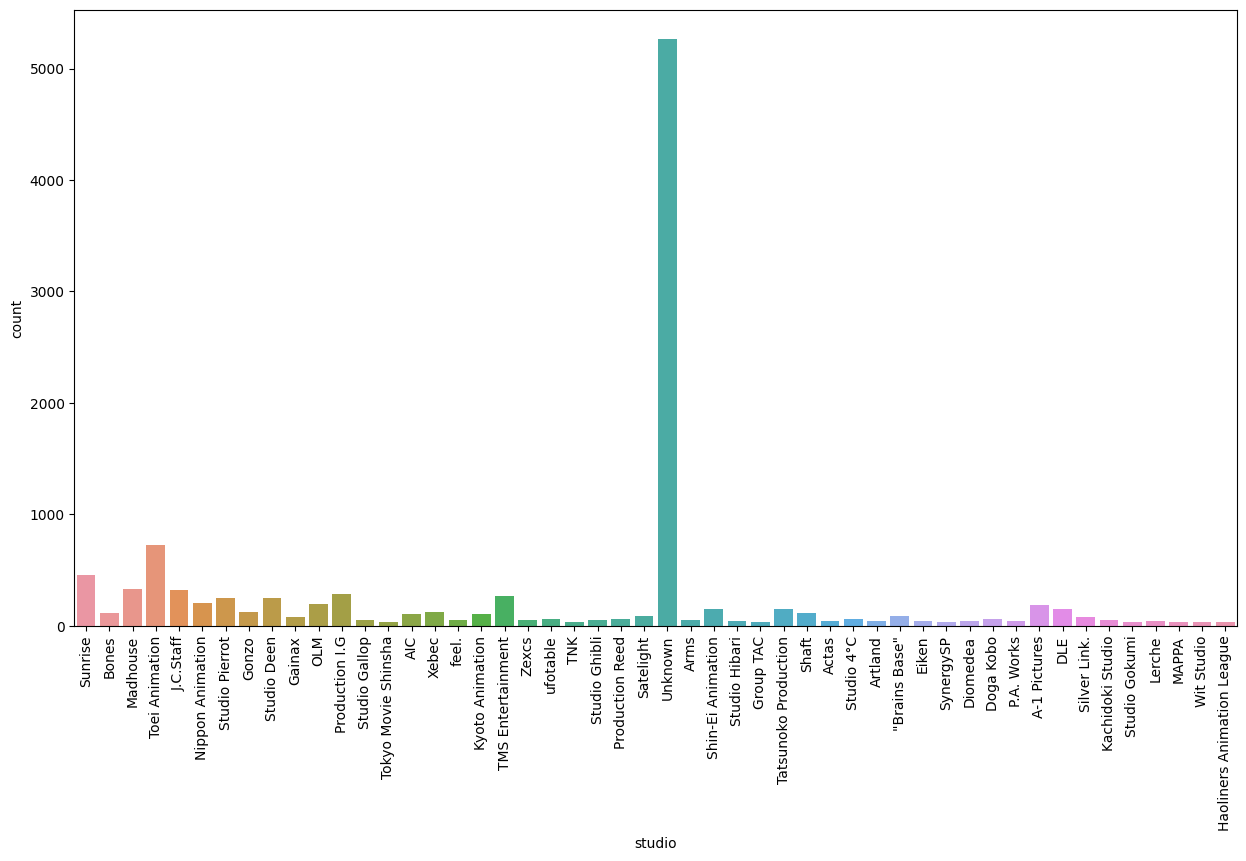

In [22]:
top_50_studios = animation_df['studio'].value_counts().head(50).index
filtered_df = animation_df[animation_df['studio'].isin(top_50_studios)]

#studio
plt.figure(figsize=(15,8))
sns.countplot(x='studio', data = filtered_df)
plt.xticks(rotation = 90)
plt.show()

As seen here, excluding for Unknown, Toei Animation produces the most number or anime, and next to it is Sunrise.

Now I will make a new df with just the name of the Anime, rank, popularity, members,favorites,reviewers and Animation_score. Let's see first the Top 10 for each category

### **Rank**

In [64]:
animation_df[['name','rank']].sort_values(by='rank').head(10)

,name,rank
3246,Fullmetal Alchemist: Brotherhood,1
9975,Kimi no Na wa.,2
4733,Steins;Gate,3
8646,Gintama°,4
5432,Hunter x Hunter (2011),5
670,Ginga Eiyuu Densetsu,6
5010,Gintama',7
6146,Gintama': Enchousen,8
11478,3-gatsu no Lion 2nd Season,9
8621,Koe no Katachi,10


### **Popularity**

In [66]:
animation_df[['name','popularity']].sort_values(by='popularity', ascending = True).head(10)

,name,popularity
1250,Death Note,1
6320,Shingeki no Kyojin,2
5557,Sword Art Online,3
3246,Fullmetal Alchemist: Brotherhood,4
9160,One Punch Man,5
7441,Tokyo Ghoul,6
4733,Steins;Gate,7
3775,Angel Beats!,8
6975,No Game No Life,9
9,Naruto,10


### **Members**

In [67]:
animation_df[['name','members']].sort_values(by='members', ascending = False).head(10)

,name,members
1250,Death Note,1610561
6320,Shingeki no Kyojin,1500958
5557,Sword Art Online,1442099
3246,Fullmetal Alchemist: Brotherhood,1355349
9160,One Punch Man,1195384
7441,Tokyo Ghoul,1148869
4733,Steins;Gate,1139182
3775,Angel Beats!,1105583
6975,No Game No Life,1098928
9,Naruto,1091313


### **Favorites**

In [68]:
animation_df[['name','favorites']].sort_values(by='favorites', ascending = False).head(10)

,name,favorites
3246,Fullmetal Alchemist: Brotherhood,120331
4733,Steins;Gate,104173
1250,Death Note,96146
5432,Hunter x Hunter (2011),76048
6320,Shingeki no Kyojin,70555
1287,Code Geass: Hangyaku no Lelouch,68684
1627,Tengen Toppa Gurren Lagann,54079
5557,Sword Art Online,53268
2943,Clannad: After Story,50079
1410,Naruto: Shippuuden,48972


## **Reviewers**

In [69]:
animation_df[['name','reviewers']].sort_values(by='reviewers', ascending = False).head(10)

,name,reviewers
1250,Death Note,1107955
6320,Shingeki no Kyojin,1038161
5557,Sword Art Online,1007035
3246,Fullmetal Alchemist: Brotherhood,826899
9160,One Punch Man,806647
7441,Tokyo Ghoul,745530
9,Naruto,716412
6975,No Game No Life,699945
3775,Angel Beats!,693192
1287,Code Geass: Hangyaku no Lelouch,681621


In [49]:
columns = ['rank', 'popularity', 'members','favorites','reviewers', 'Animation_score']

df = animation_df[columns]
df.head()

,rank,popularity,members,favorites,reviewers,Animation_score
0,26,39,795733,43460,405664,8.81
1,164,449,197791,776,120243,8.41
2,255,146,408548,10432,212537,8.30
3,2371,1171,79397,537,32837,7.33
4,3544,3704,11708,14,4894,7.03


### **Animation Score**

In [73]:
animation_df[['name','Animation_score']].sort_values(by='Animation_score', ascending = False).head(10)

,name,Animation_score
13405,Violence Voyager,10.00
11409,Tanabata Monogatari,10.00
11435,Tat-chan - Momo-chan no Fushigina Taiken,9.80
13451,Pussy,9.25
13323,Tatakae! Dokan-kun: Robolympic-hen,9.25
3246,Fullmetal Alchemist: Brotherhood,9.24
9975,Kimi no Na wa.,9.14
4733,Steins;Gate,9.14
8646,Gintama°,9.13
5432,Hunter x Hunter (2011),9.12


As we can see here, FMA: Brotherhood and Death Note takes most of the top spots in each category. Now I will start with working on ranking the anime based on these metrics.

# **Ranking the Anime**

Now I'm going to start my analysis on what are the GOATS of anime. First lets see the statistics of the 'df' DataFrame.

In [33]:
print(df.describe())

print(df[['popularity','members', 'favorites', 'reviewers', 'Animation_score']].median())

               rank    popularity       members      favorites     reviewers  \
count  13178.000000  13178.000000  1.317800e+04   13178.000000  1.317800e+04   
mean    6811.543937   7700.767491  2.761020e+04     371.219760  1.379346e+04   
std     3963.268590   4600.042864  8.763984e+04    2967.980978  5.011947e+04   
min        1.000000      1.000000  1.300000e+01       0.000000  1.000000e+00   
25%     3387.250000   3472.250000  2.312500e+02       0.000000  5.400000e+01   
50%     6776.500000   7911.000000  1.543000e+03       2.000000  4.970000e+02   
75%    10174.000000  11809.000000  1.386525e+04      26.000000  5.436250e+03   
max    13838.000000  15360.000000  1.610561e+06  120331.000000  1.107955e+06   

       Animation_score  
count     13178.000000  
mean          6.307369  
std           1.094408  
min           1.000000  
25%           5.610000  
50%           6.390000  
75%           7.110000  
max          10.000000  
popularity         7911.00
members            1543.00


Now, I will put weights on each column here to see which metrics to prioritize.

In [58]:
# Assign weights
weights = {
    'rank': 0.2,
    'popularity': 0.225,
    'members': 0.225,
    'favorites': 0.25,
    'reviewers': 0.05,
    'Animation_score': 0.05
}

I decided on these metrics because I think people saying that this anime is their favorite of all time matters most and the number of reviewers reviewing the anime matters least in this weights heirarchy.

Now I will standandardize the data so that no one metric (specially one with higher numbers) will dominate the other weights in ranking the animes.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,rank,popularity,members,favorites,reviewers,Animation_score
0,-1.712173,-1.665649,8.764872,14.518427,7.819025,2.286830
1,-1.677352,-1.576516,1.941894,0.136388,2.123996,1.921322
2,-1.654390,-1.642388,4.346793,3.389901,3.965546,1.820807
3,-1.120467,-1.419555,0.590927,0.055858,0.379977,0.934450
4,-0.824488,-0.868887,-0.181456,-0.120362,-0.177572,0.660319


Now its time to combine all these and create a 'weighted_score' column in which the highest weighted score is the best anime of all time and the lowest is one of the worst of all time.

In [71]:
weighted_score = []

for index, row in df_scaled.iterrows():
    score = 0
    for metric in weights:
        score += row[metric] * weights[metric]
    weighted_score.append(score)


GOAT_df = pd.DataFrame({'Name':animation_df['name'], 'weighted_score':weighted_score})

GOAT_df.sort_values(by='weighted_score', ascending=False, inplace=True)

GOAT_df.head(50)

,Name,weighted_score
3246,Fullmetal Alchemist: Brotherhood,13.738751
1250,Death Note,12.613176
4733,Steins;Gate,11.625504
6320,Shingeki no Kyojin,10.101431
1287,Code Geass: Hangyaku no Lelouch,8.522827
5557,Sword Art Online,8.488827
5432,Hunter x Hunter (2011),8.326671
1627,Tengen Toppa Gurren Lagann,6.552235
9160,One Punch Man,6.179674
1410,Naruto: Shippuuden,6.128262


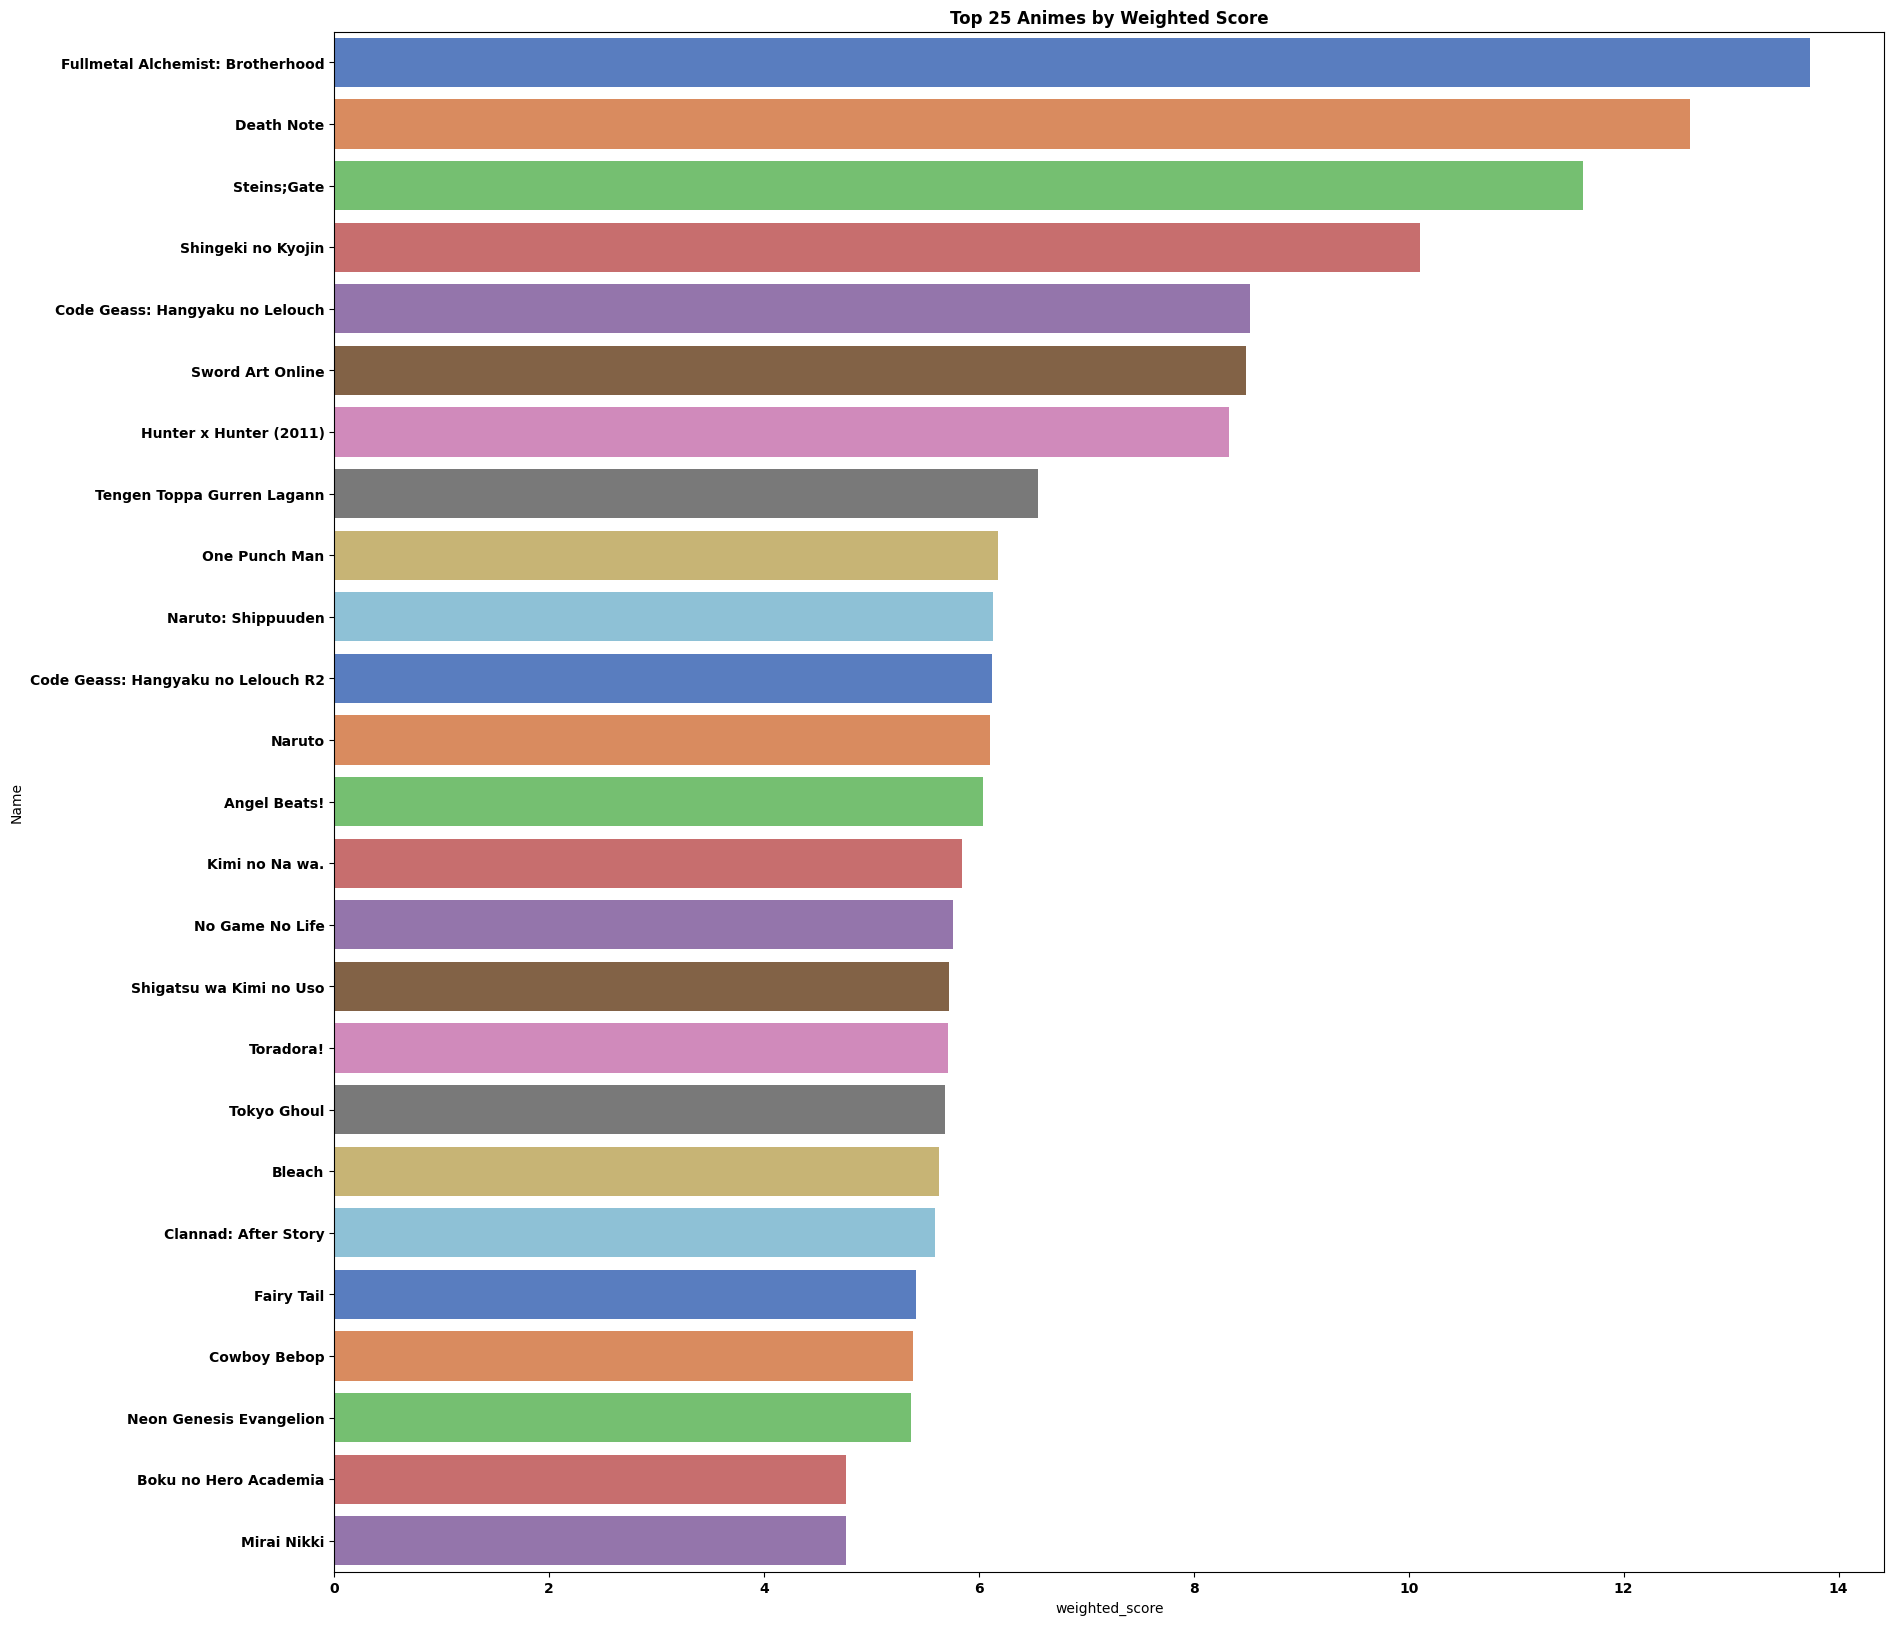

In [85]:
top_n = 25
top_items = GOAT_df.nlargest(top_n, 'weighted_score')
plt.figure(figsize = (20,20))
sns.barplot(x='weighted_score', y='Name', data=top_items, palette='muted')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title('Top 25 Animes by Weighted Score', weight='bold')
plt.show()

## ***Final Thoughts***

Here we can now see the top 25 Animes of all time based on the datased graphed and the top 50 of all time tabulated. Well since rankings are subjective I do disagree with some of the rankings here but objectively this is what the data says. I do not have complaints for No.1 and No.2 ranked animes since they have a great story and great animation, but I think that One Piece should at least be in the top 20 since 2 (Naruto and Bleach) of the Big 3 Mangas: One Piece, Naruto, Bleach are there. 😢😢 Lol.

Well anyway, I had fun doing this Data Analysis project.

If you have any comments and suggestions on how could I have done the project so. Please feel free to leave a comment or message me.

Thank you!

# -END-